In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.int(x)
f2 = np.vectorize(f)


In [167]:
offense_bias_person = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_persons')
offense_bias_property = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_property')
offense_bias_society = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_society')

In [168]:
offense_bias_property = offense_bias_property[offense_bias_property['Bias motivation']!='Total']
offense_bias_property = offense_bias_property[offense_bias_property['Bias motivation']!='Single-Bias Incidents']

offense_bias_property.head()

,Bias motivation,Robbery,Burglary,Larceny-theft,Motor vehicle theft,Arson,Destruction/damage/vandalism,Other
2,Race/Ethnicity/Ancestry:,68,76,195,26,16,854,50
3,Anti-White,15,24,79,8,1,91,20
4,Anti-Black or African American,14,24,22,3,10,474,3
5,Anti-American Indian or Alaska Native,2,8,49,9,1,14,12
6,Anti-Asian,4,2,5,0,0,30,2


In [169]:
motivation_bar =offense_bias_property['Bias motivation']
robbery_bar = offense_bias_property['Robbery']
burglary_bar = offense_bias_property['Burglary']
theft_bar = offense_bias_property['Larceny-theft']
vehicle_bar = offense_bias_property['Motor vehicle theft']
arson_bar = offense_bias_property['Arson']
destruction_bar = offense_bias_property['Destruction/damage/vandalism']
other_bar_prop = offense_bias_property['Other']


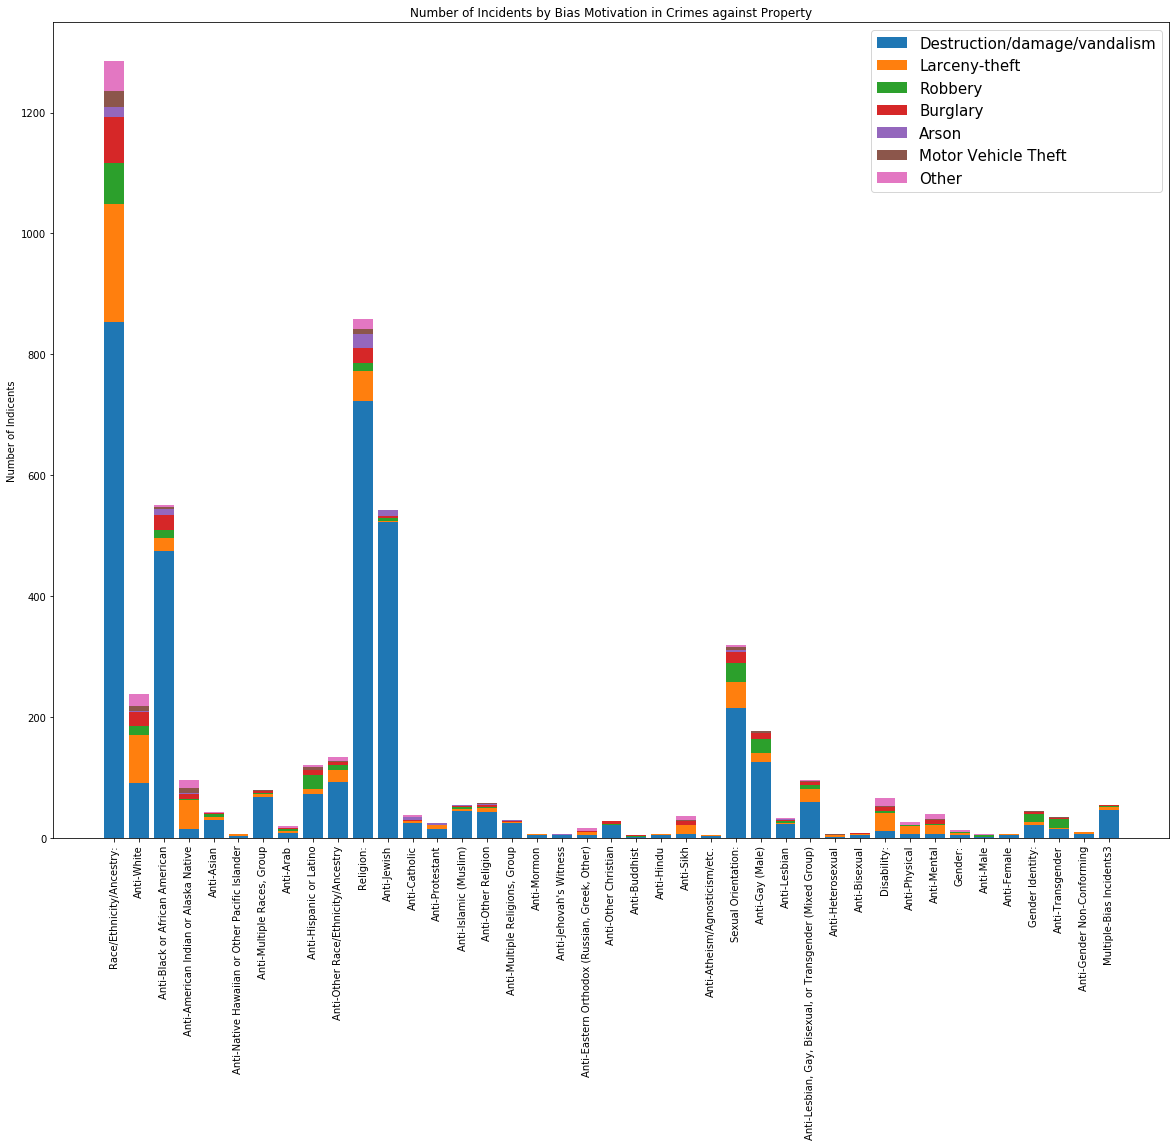

In [170]:
p1 = plt.bar(motivation_bar, f2(destruction_bar))
p2 = plt.bar(motivation_bar, f2(theft_bar), bottom = f2(destruction_bar))
p3 = plt.bar(motivation_bar, f2(robbery_bar), bottom = f2(theft_bar)+f2(destruction_bar))
p4 = plt.bar(motivation_bar, f2(burglary_bar), bottom = f2(robbery_bar)+f2(theft_bar)+f2(destruction_bar))
p5 = plt.bar(motivation_bar, f2(arson_bar), bottom = f2(burglary_bar)+f2(robbery_bar)+f2(theft_bar)+f2(destruction_bar))
p6 = plt.bar(motivation_bar, f2(vehicle_bar), bottom = f2(arson_bar)+f2(burglary_bar)+f2(robbery_bar)+f2(theft_bar)+f2(destruction_bar))
p7 = plt.bar(motivation_bar, f2(other_bar_prop), bottom = f2(vehicle_bar)+f2(arson_bar)+f2(burglary_bar)+f2(robbery_bar)+f2(theft_bar)+f2(destruction_bar))
plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Bias Motivation in Crimes against Property')
plt.rcParams['figure.figsize'] = (20, 15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0],p6[0], p7[0]), ('Destruction/damage/vandalism', 'Larceny-theft','Robbery', 'Burglary', 'Arson', 'Motor Vehicle Theft', 'Other'), prop={'size': 15})

plt.xticks(offense_bias_property['Bias motivation'], rotation=90)
plt.show()

In [171]:
offense_bias_person = offense_bias_person[offense_bias_person['Bias motivation']!='Total']
offense_bias_person = offense_bias_person[offense_bias_person['Bias motivation']!='Single-Bias Incidents']

offense_bias_person = offense_bias_person.dropna()
offense_bias_person.head()

,Bias motivation,Murder and nonnegligent manslaughter,Rape,Aggravated assault,Simple assault,Intimidation,Other
2,Race/Ethnicity/Ancestry:,8,9,659,1121.0,1627,21
3,Anti-White,3,6,114,250.0,289,9
4,Anti-Black or African American,4,2,323,486.0,908,2
5,Anti-American Indian or Alaska Native,0,0,6,30.0,11,5
6,Anti-Asian,0,0,18,46.0,60,0


In [172]:
offense_bias_person['Simple assault'] = offense_bias_person['Simple assault'].astype(int)

In [173]:
offense_bias_person

,Bias motivation,Murder and nonnegligent manslaughter,Rape,Aggravated assault,Simple assault,Intimidation,Other
2,Race/Ethnicity/Ancestry:,8,9,659,1121,1627,21
3,Anti-White,3,6,114,250,289,9
4,Anti-Black or African American,4,2,323,486,908,2
5,Anti-American Indian or Alaska Native,0,0,6,30,11,5
6,Anti-Asian,0,0,18,46,60,0
7,Anti-Native Hawaiian or Other Pacific Islander,0,0,5,6,7,0
8,"Anti-Multiple Races, Group",0,0,7,16,60,0
9,Anti-Arab,0,0,18,17,37,0
10,Anti-Hispanic or Latino,1,0,129,197,190,4
11,Anti-Other Race/Ethnicity/Ancestry,0,1,39,73,65,1


In [174]:
motivation_bar_person = offense_bias_person['Bias motivation']
murder_bar = offense_bias_person['Murder and nonnegligent manslaughter']
rape_bar = offense_bias_person['Rape']
agg_bar = offense_bias_person['Aggravated assault']
simp_bar = offense_bias_person['Simple assault']
intimidation_bar = offense_bias_person['Intimidation']
other_bar_person = offense_bias_person['Other']

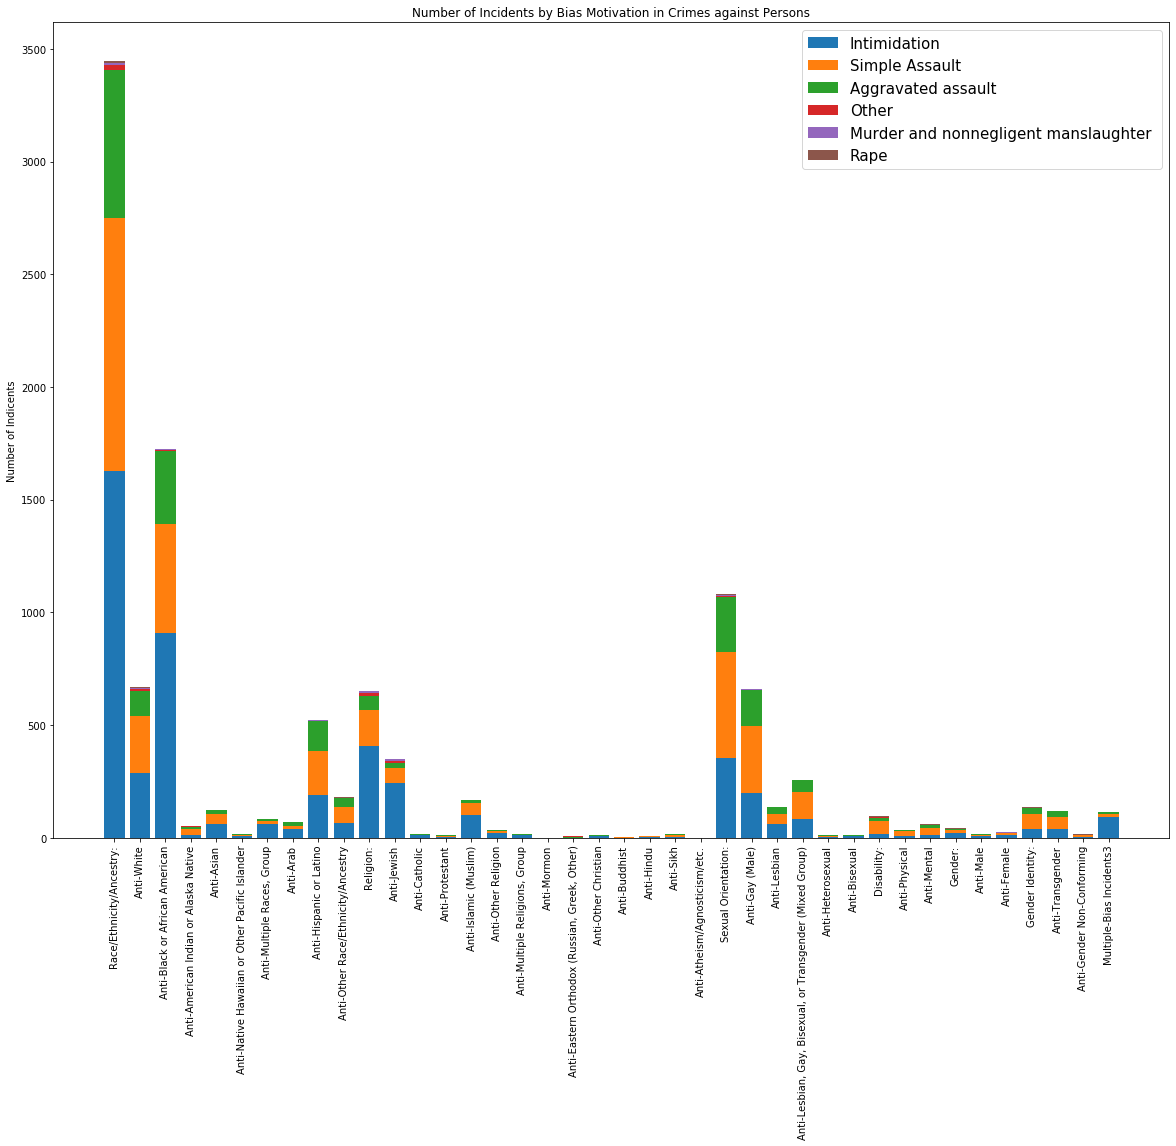

In [175]:
m1 = plt.bar(motivation_bar_person, f2(intimidation_bar))
m2 = plt.bar(motivation_bar_person, f2(simp_bar),bottom = f2(intimidation_bar))
m3 = plt.bar(motivation_bar_person, f2(agg_bar), bottom = f2(simp_bar)+f2(intimidation_bar))
m4 = plt.bar(motivation_bar_person, f2(other_bar_person), bottom = f2(agg_bar)+f2(simp_bar)+f2(intimidation_bar))
m5 = plt.bar(motivation_bar_person, f2(murder_bar), bottom =f2(other_bar_person)+ f2(agg_bar)+f2(simp_bar)+f2(intimidation_bar))
m6 = plt.bar(motivation_bar_person, f2(rape_bar), bottom =f2(murder_bar)+f2(other_bar_person)+ f2(agg_bar)+f2(simp_bar)+f2(intimidation_bar))

plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Bias Motivation in Crimes against Persons')
plt.rcParams['figure.figsize'] = (20, 15)
plt.xticks(offense_bias_person['Bias motivation'], rotation=90)
plt.legend((m1[0], m2[0], m3[0], m4[0], m5[0],m6[0]), ('Intimidation', 'Simple Assault','Aggravated assault', 'Other', 'Murder and nonnegligent manslaughter ', 'Rape'), prop={'size': 15})
plt.show()

In [176]:
offense_bias_society.head()
offense_bias_society = offense_bias_society[offense_bias_society['Bias motivation']!='Total']
offense_bias_society = offense_bias_society[offense_bias_society['Bias motivation']!='Single-Bias Incidents']

Text(0, 0.5, 'Number of Incidents')

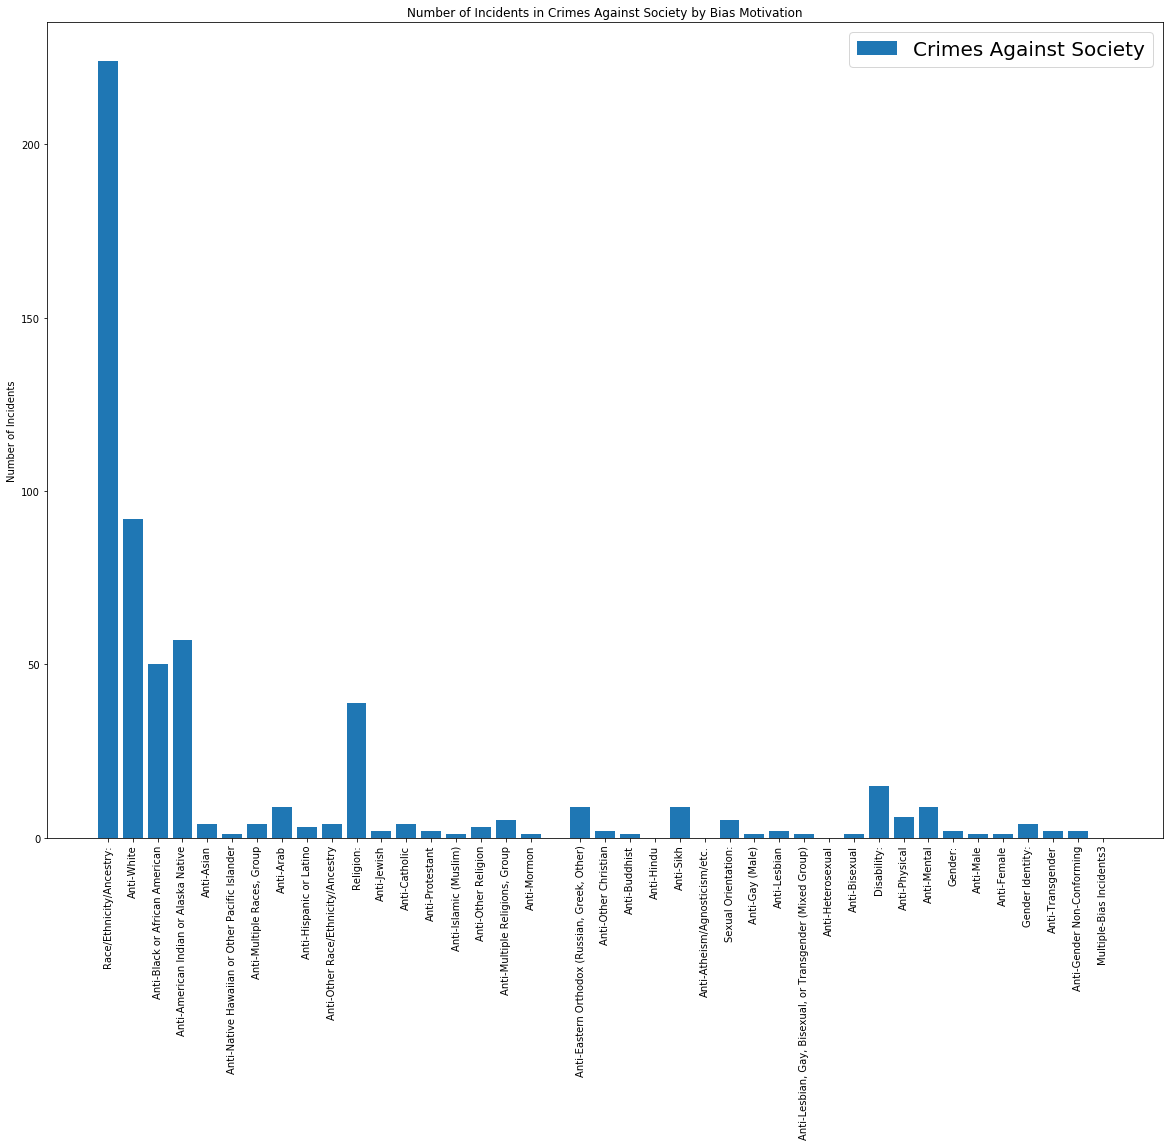

In [177]:
b1 = plt.bar(offense_bias_society['Bias motivation'], offense_bias_society['Crimes against society'])
plt.xticks(offense_bias_person['Bias motivation'], rotation=90)
plt.legend([b1[0]], ['Crimes Against Society'],prop={'size': 20})
plt.title('Number of Incidents in Crimes Against Society by Bias Motivation')
plt.ylabel('Number of Incidents')